In [6]:
import numpy as np
import pickle

noTarget = 1
tPosList = []



gridWidthList = [30]
gridHeightList = [30]
noAgentList = [20]
noObsList = [5]
eList = [2000]
LoopVal = 1
neighborWeightsList = [0.85]
playModeList = ['random'] 

for t in range(noTarget):
    tPosList.append([(int(gridHeightList[0]/(t+1))-1), (int(gridWidthList[0]/(t+1))-1)])

for CriteriaVal in range(len(gridWidthList)):
    height = gridWidthList[CriteriaVal]
    width = gridHeightList[CriteriaVal]
    Agent = noAgentList[CriteriaVal]
    Obs = noObsList[CriteriaVal]
    epoch = eList[CriteriaVal]
    neighborWeights = neighborWeightsList[CriteriaVal]

    aPosListLoopTotal = []
    for Loop in range(LoopVal):
        sX =[i for i in range(height-1)]
        sY =[i for i in range(width-1)]

        aPosListTotal = []
        for ep in range(0,epoch):
            aPosList = []
            for a in range(Agent):
                aPosX = np.random.choice(sX)
                aPosY = np.random.choice(sY)
                if [aPosX, aPosY] not in tPosList:
                    aPosList.append([aPosX, aPosY])
                else:
                    aPosX = np.random.choice(sX)
                    aPosY = np.random.choice(sY)
                    aPosList.append([aPosX, aPosY])
                aPosListTotal.append(aPosList)
        aPosListLoopTotal.append(aPosListTotal)
        
    p = aPosListLoopTotal
    with open("./fileOut/positions"+str(CriteriaVal)+"_BRNETp_G30A0", "wb") as Pp:   #Pickling
        pickle.dump(p, Pp)
        
print("hello")

hello


In [24]:
import numpy as np
def neighbors(noAgent, aPosList, neighborZone, gridCell):
#         self.aPosList = aPosList
        neighborDict = {}
        for a in range(noAgent):
            neighborDict[a] = []
#         NeighborPosList = []
        NeighborPos = []
        for a in range(noAgent):
            PlayerPos = aPosList[a]
            otherPlayerPos = aPosList[:]
            otherPlayerPos.remove(aPosList[a])

            NeighborPosAll = []
            upVal = [-u for u in range(neighborZone, 0, -1)]

            downVal = [d for d in range(neighborZone, 0, -1)]
            upDownList = [upVal,[0],downVal]
            upDownList = [item for sublist in upDownList for item in sublist]
            
            leftVal = [-l for l in range(neighborZone, 0, -1)]
            rightVal = [r for r in range(neighborZone, 0, -1)]
            leftRightList = [leftVal,[0],rightVal]
            leftRightList = [item for sublist in leftRightList for item in sublist]

            for l in upDownList:
                for m in leftRightList:
#                     NeighborPosAll.append([PlayerPos[0]+l, PlayerPos[1]+m])
                    NeighborPos.append([PlayerPos[0]+l, PlayerPos[1]+m])
#             print("own state:", gridCell.index(PlayerPos))        
#             NeighborPos = [gridCell.index(element) for element in gridCell if element in NeighborPosAll]
#             print(NeighborPos,"\n")
            
            for item in otherPlayerPos:
                if item in NeighborPos:
                    neighborDict[a].append(item)
                    # neighborDict[a].append(item[1])
#             NeighborPosList.append(NeighborPos)
            NeighborPos = []
#             print(neighborDict)
        return neighborDict#, NeighborPosList

noAgent = 3
height = 10
width = 10
# aPosList =[[3,4], [0,0], [1,4], [2,3], [0,3]]
# aPosList =[[3,4], [0,0], [2,3]]

sX =[i for i in range(height-1)]
sY =[i for i in range(width-1)]
aPosList = []    
for a in range(noAgent):
    aPosX = np.random.choice(sX)
    aPosY = np.random.choice(sY)

    aPosX = np.random.choice(sX)
    aPosY = np.random.choice(sY)
    aPosList.append([aPosX, aPosY])

gridCell = []
for i in range(height):
    for j in range(width):
        gridCell.append([i,j])
        
neighborZone = int(round(np.sqrt((height * width)/noAgent),0))
print(neighborZone)
# neighborDict, NeighborPosList = neighbors(noAgent, aPosList, neighborZone, gridCell)
neighborDict = neighbors(noAgent, aPosList, neighborZone, gridCell)
print(neighborDict,"\n")


# print(NeighborPosList,"\n")


# print(gridCell)    

# print([element for element in gridCell if element in NeighborPosLi[0]])


def render(height, width, aPosList):
    for i in range(height):
        for j in range(width):
            if [i,j] in aPosList:
                aPosIndex = aPosList.index([i,j])
                print(" P"+str(aPosIndex)+" ", end='')
            else:
                print(" .  ", end='')
        print("")
render(height,width,aPosList)
print("\n")

disp = True
neighborPosList = []
for a in range(noAgent):
    neighborsPrint = []
    indNeighbor = []
    for player in neighborDict[a]:
        neighborsPrint.append("P"+str(aPosList.index(player)))
        indNeighbor.append(aPosList.index(player))
    if disp == True:
        print("Neighbor of P"+ str(a)+" :" + str(neighborsPrint))
    neighborPosList.append(indNeighbor)
    indNeighbor = []
if disp == True:
    print('\n')

6
{0: [[4, 6]], 1: [[4, 6]], 2: [[1, 7], [5, 0]]} 

 .   .   .   .   .   .   .   .   .   .  
 .   .   .   .   .   .   .   P0  .   .  
 .   .   .   .   .   .   .   .   .   .  
 .   .   .   .   .   .   .   .   .   .  
 .   .   .   .   .   .   P2  .   .   .  
 P1  .   .   .   .   .   .   .   .   .  
 .   .   .   .   .   .   .   .   .   .  
 .   .   .   .   .   .   .   .   .   .  
 .   .   .   .   .   .   .   .   .   .  
 .   .   .   .   .   .   .   .   .   .  


Neighbor of P0 :['P2']
Neighbor of P1 :['P2']
Neighbor of P2 :['P0', 'P1']




In [6]:

import statistics

set1 =[1, 2, 3, 3, 4, 4, 4, 5, 5, 6]

print(max(set1,key=set1.count))
# Printing out mode of given data-set
print("Mode of given data set is % s" % (statistics.mode(set1)))


4
Mode of given data set is 4


sensitivity:  0.55


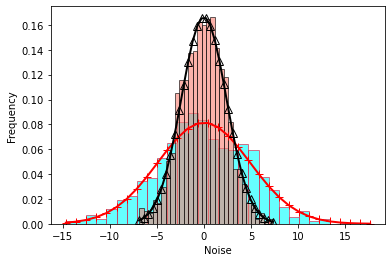

In [25]:
x = 1
# print("actual: ",qtableList[0][0][x])
import numpy as np
import matplotlib.pyplot as plt
delta = 0.0001
varepsilon = 0.5
varepsilon1 = 2.0
lr = 0.1
maxDev = 5-(-0.5)
maxDev1 = 10-(-0.5)
sensitivity = lr * maxDev
sensitivity1 = lr * maxDev1
print("sensitivity: ", sensitivity)
mu = 0
l = -0.5
u = 5
u1 = 10

c = np.sqrt(2*np.log(1.25/delta))
sigma = ((c*sensitivity)/varepsilon)+0.12
sigma1 = ((c*sensitivity1)/varepsilon1)+0.12

noise = []
noise1 = []
for i in range(1000):
    ## random.normal(loc=0.0, scale=1.0, size=None)
    ## scale = standard deviation (sigma)
    ## sigma >= (c x sensitivity)/eps 
    ## c > np.sqrt(2 ln (1.25/delta))
    sampledNoise = np.random.normal(0, sigma)
    sampledNoise1 = np.random.normal(0, sigma1)
#     if sampledNoise > u: 
#         noise.append(u) ##
#     elif sampledNoise < l:
#         noise.append(l)
#     else:
#         noise.append(sampledNoise)
    noise.append(sampledNoise)
    noise1.append(sampledNoise1)
# print("modified: ",qtableList[0][21][x]+np.sort(noise))
import seaborn as sns
count,bins, ignored = plt.hist(noise, 30, density=True, color = "aqua", ec="crimson",alpha=0.6)
count1,bins1, ignored1 = plt.hist(noise1, 30, density=True, color = "salmon", ec="black",alpha=0.6)
# sns.displot(noise, bins=30, kde=True);
# print(bins)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * 
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='red', marker="+", ms=8, markerfacecolor="none",
         markeredgecolor='red', markeredgewidth=1)
plt.plot(bins1, 1/(sigma1 * np.sqrt(2 * np.pi)) * 
         np.exp( - (bins1 - mu)**2 / (2 * sigma1**2) ),
         linewidth=2, color='black', marker="^", ms=8, markerfacecolor="none",
         markeredgecolor='black', markeredgewidth=1)
plt.xlabel("Noise")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# libraries
import numpy as np
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


delta = 0.0001
varepsilon = 0.5
varepsilon1 = 2.0
lr = 0.1
maxDev = 5-(-0.5)
maxDev1 = 10-(-0.5)
sensitivity = lr * maxDev
sensitivity1 = lr * maxDev1
print("sensitivity: ", sensitivity)
mu = 0
l = -0.5
u = 5
u1 = 10

c = np.sqrt(2*np.log(1.25/delta))
sigma = ((c*sensitivity)/varepsilon)+0.12
sigma1 = ((c*sensitivity1)/varepsilon1)+0.12

noise = []
noise1 = []
for i in range(1000):
    sampledNoise = np.random.normal(0, sigma)
    sampledNoise1 = np.random.normal(0, sigma1)
    noise.append(sampledNoise)
    noise1.append(sampledNoise1)

# dataframe
df = pd.DataFrame({
'var1': noise1,
'var2': [-1*x for x in noise]
})
print(df)
# Fig size
plt.rcParams["figure.figsize"]=12,8

# plot histogram chart for var1
sns.histplot(x=df.var1, stat="density", bins=30, color = 'aqua', edgecolor='black')

# plot histogram chart for var2
n_bins = 20
# get positions and heights of bars
heights, bins = np.histogram(df.var2, density=True, bins=n_bins) 
# multiply by -1 to reverse it
heights *= -1
bin_width = np.diff(bins)[0]
bin_pos =( bins[:-1] + bin_width / 2) * -1

# plot
plt.bar(bin_pos, heights, width=bin_width, color='crimson', edgecolor='black')

# show the graph
plt.show()

In [ ]:
from scipy.stats import truncnorm

lr = 0.1
delta = 0.0001
varepsilon = 1.0

maxDev = 5.5-(-1.5)
sensitivity = lr * maxDev
mu = 2


c = np.sqrt(2*np.log(1.25/delta))
sd = ((c*sensitivity)/varepsilon)+0.12

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = get_truncated_normal(mean=2, sd=2, low=-1.5, upp=5.5)
# X.rvs(10).tolist()

df = pd.DataFrame({
'var1': X.rvs(10000).tolist()
})

count,bins, ignored  = plt.hist(df.var1, 30, density=True, color = "aqua", ec="crimson",alpha=0.6)


In [ ]:
import numpy as np
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import truncnorm

# sigma = (1.586 * sensitivity)/varepsilon
lr = 0.1
delta = 0.0001
varepsilon = 1
maxDev = 5.5-(-1.5)
sensitivity = lr * maxDev
c = np.sqrt(2*np.log(1.25/delta))
print(sensitivity)
sigma = (c*sensitivity)/varepsilon
noise = []
for i in range(10000):
    sampledNoise = np.random.normal(2, sigma)
    noise.append(sampledNoise)
import seaborn as sns
count,bins, ignored = plt.hist(noise, 30, density=True, color = "aqua", ec="crimson",alpha=0.6)

sd = sigma
def get_truncated_normal(mean=2, sd=2, low=-1.5, upp=5.5):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = get_truncated_normal(mean=2, sd=2, low=-1.5, upp=5.5)
print(X.rvs(1).tolist())
# print(X)

df = pd.DataFrame({
'var1': X.rvs(10000).tolist()
})

count,bins, ignored  = plt.hist(df.var1, 30, density=True, color = "crimson", ec="crimson",alpha=0.6)

